# Visualizing AirBnB Listings in San Francisco

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
import csv

In [2]:
data = pd.read_csv(r"C:\Users\Tatiksha\Documents\Data Programming\Final Project data\San_francisco_finaloutlier.csv", encoding= 'utf8')
data

,Unnamed: 0,id,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,priceperperson,zscore
0,0,958,1169,Holly,within a day,100%,t,1.0,t,t,...,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.74,56.666667,0.112827
1,1,3850,4921,Kevin,within an hour,100%,t,2.0,t,t,...,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.28,49.500000,0.153429
2,2,5858,8904,Philip And Tania,within a day,80%,f,2.0,t,t,...,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,47.000000,0.167592
3,3,7918,21994,Aaron,within an hour,86%,t,10.0,t,t,...,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,32.500000,0.249741
4,4,8142,21994,Aaron,within an hour,86%,t,10.0,t,t,...,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,32.500000,0.249741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,8106,39342094,4332552,Eugenia,NaN,NaN,f,0.0,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.800000,0.358159
8082,8107,39343373,245447609,Kim,within an hour,100%,f,9.0,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.150596
8083,8108,39344101,27123550,Jacquelyn,within a few hours,78%,f,6.0,t,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,0.042953
8084,8109,39350028,107434423,Blueground,within an hour,98%,f,900.0,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.500000,0.095850


In [4]:
#dropping the first column since it was a duplicate column
sf= data.drop(columns=['Unnamed: 0'])
sf

,id,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,priceperperson,zscore
0,958,1169,Holly,within a day,100%,t,1.0,t,t,Duboce Triangle,...,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.74,56.666667,0.112827
1,3850,4921,Kevin,within an hour,100%,t,2.0,t,t,Inner Sunset,...,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.28,49.500000,0.153429
2,5858,8904,Philip And Tania,within a day,80%,f,2.0,t,t,Bernal Heights,...,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,47.000000,0.167592
3,7918,21994,Aaron,within an hour,86%,t,10.0,t,t,Cole Valley,...,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,32.500000,0.249741
4,8142,21994,Aaron,within an hour,86%,t,10.0,t,t,Cole Valley,...,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,32.500000,0.249741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,39342094,4332552,Eugenia,NaN,NaN,f,0.0,t,f,Bernal Heights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.800000,0.358159
8082,39343373,245447609,Kim,within an hour,100%,f,9.0,t,f,Western Addition/NOPA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.150596
8083,39344101,27123550,Jacquelyn,within a few hours,78%,f,6.0,t,t,Bayview,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,0.042953
8084,39350028,107434423,Blueground,within an hour,98%,f,900.0,t,f,Tenderloin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.500000,0.095850


In [5]:
#checking the data type
sf.dtypes

id                               int64
host_id                          int64
host_name                       object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
zipcode                         object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
has_availability                object
availability_365                 int64
number_of_reviews                int64
review_scores_rating     

In [5]:
#Visualising Heatmap
!pip install folium
import folium
from folium import plugins
%matplotlib inline

In [ ]:
sfmap =folium.Map([37.76931,-122.43386])
sfmap

In [ ]:
from folium.plugins import HeatMap

In [ ]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(sfmap)
sfmap

# Descriptive Stats

In [5]:
sf_stat = sf.describe()
sf_stat.round(2)

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,priceperperson,zscore
count,8086.00,8.086000e+03,8078.00,8086.00,8086.00,8086.00,8074.00,8082.00,8077.00,8086.00,...,6449.00,6446.00,6446.00,6445.00,6447.00,6445.00,6445.00,6495.00,8086.00,8086.00
mean,20223946.36,6.138122e+07,90.69,37.77,-122.43,3.16,1.40,1.35,1.75,209.35,...,95.42,9.75,9.60,9.85,9.82,9.68,9.37,1.87,68.49,0.18
std,12282538.42,7.992084e+07,324.99,0.02,0.03,1.90,0.92,0.93,1.16,225.49,...,7.56,0.73,0.84,0.59,0.66,0.72,0.88,2.09,45.99,0.19
min,958.00,2.800000e+01,0.00,37.70,-122.51,1.00,0.00,0.00,0.00,0.00,...,20.00,2.00,2.00,2.00,2.00,2.00,2.00,0.01,0.00,0.00
25%,8886802.75,4.381662e+06,1.00,37.75,-122.44,2.00,1.00,1.00,1.00,100.00,...,95.00,10.00,9.00,10.00,10.00,10.00,9.00,0.31,41.50,0.08
50%,21592992.50,2.161172e+07,2.00,37.77,-122.42,2.00,1.00,1.00,1.00,150.00,...,98.00,10.00,10.00,10.00,10.00,10.00,10.00,1.01,58.00,0.15
75%,31188128.00,9.957768e+07,12.00,37.79,-122.41,4.00,1.50,2.00,2.00,240.00,...,100.00,10.00,10.00,10.00,10.00,10.00,10.00,2.84,81.75,0.24
max,39354181.00,3.016759e+08,1735.00,37.83,-122.37,16.00,14.00,14.00,14.00,7500.00,...,100.00,10.00,10.00,10.00,10.00,10.00,10.00,21.19,535.71,2.60


In [ ]:
sf.head()

# Visualizations

Hosts with the most listings

In [7]:
top_host=sf.host_name.value_counts().head(10)
top_host

Zeus                      248
Sonder (San Francisco)    178
Blueground                170
Michael                   139
Kevin                     102
Landmark                  102
David                      74
Michelle                   66
Jeff                       66
Jennifer                   66
Name: host_name, dtype: int64

In [8]:
th=sf.host_id.value_counts().head(10)
th

48005494     248
219930816    178
107434423    170
4430421      102
70722023      44
117141107     43
173206762     43
38836         41
262211596     40
103340667     37
Name: host_id, dtype: int64

[Text(0, 0, 'Zeus'),
 Text(0, 0, 'Sonder (San Francisco)'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Michael'),
 Text(0, 0, 'Landmark'),
 Text(0, 0, 'Kevin'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Jeff'),
 Text(0, 0, 'Michelle'),
 Text(0, 0, 'Jennifer')]

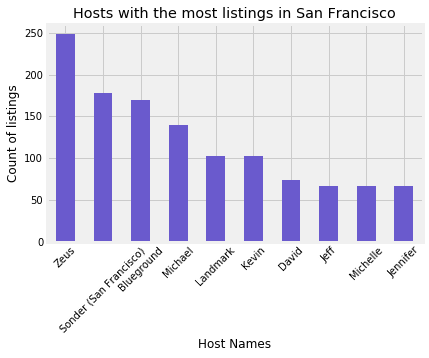

In [12]:
viz_1=top_host.plot(kind='bar', color='slateblue')
viz_1.set_title('Hosts with the most listings in San Francisco')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Hosts with a rating of 100 
--> 1,906 Hosts have a rating of 100 

In [10]:
trev= sf[sf['review_scores_rating']==100]
trev.head()

,id,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,priceperperson,zscore
32,27025,115673,Luis,NaN,NaN,t,1.0,t,f,The Castro,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,62.50,0.079778
52,44680,196626,Paul,NaN,NaN,f,2.0,t,t,Mission District,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.03,43.75,0.186005
98,75422,305973,Maria,within a day,81%,f,42.0,t,t,Excelsior,...,100.0,9.0,9.0,10.0,10.0,9.0,9.0,0.10,20.00,0.320559
113,100710,528857,Jonathan,within a day,100%,f,1.0,t,t,Mission District,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.11,90.00,0.076021
159,201313,984585,Robb,NaN,NaN,f,1.0,t,f,Telegraph Hill,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.12,91.00,0.081686


Correlation - Pearson Correlation Coefficient 

Text(0.5, 1, 'Pearson Correlation Coefficient')

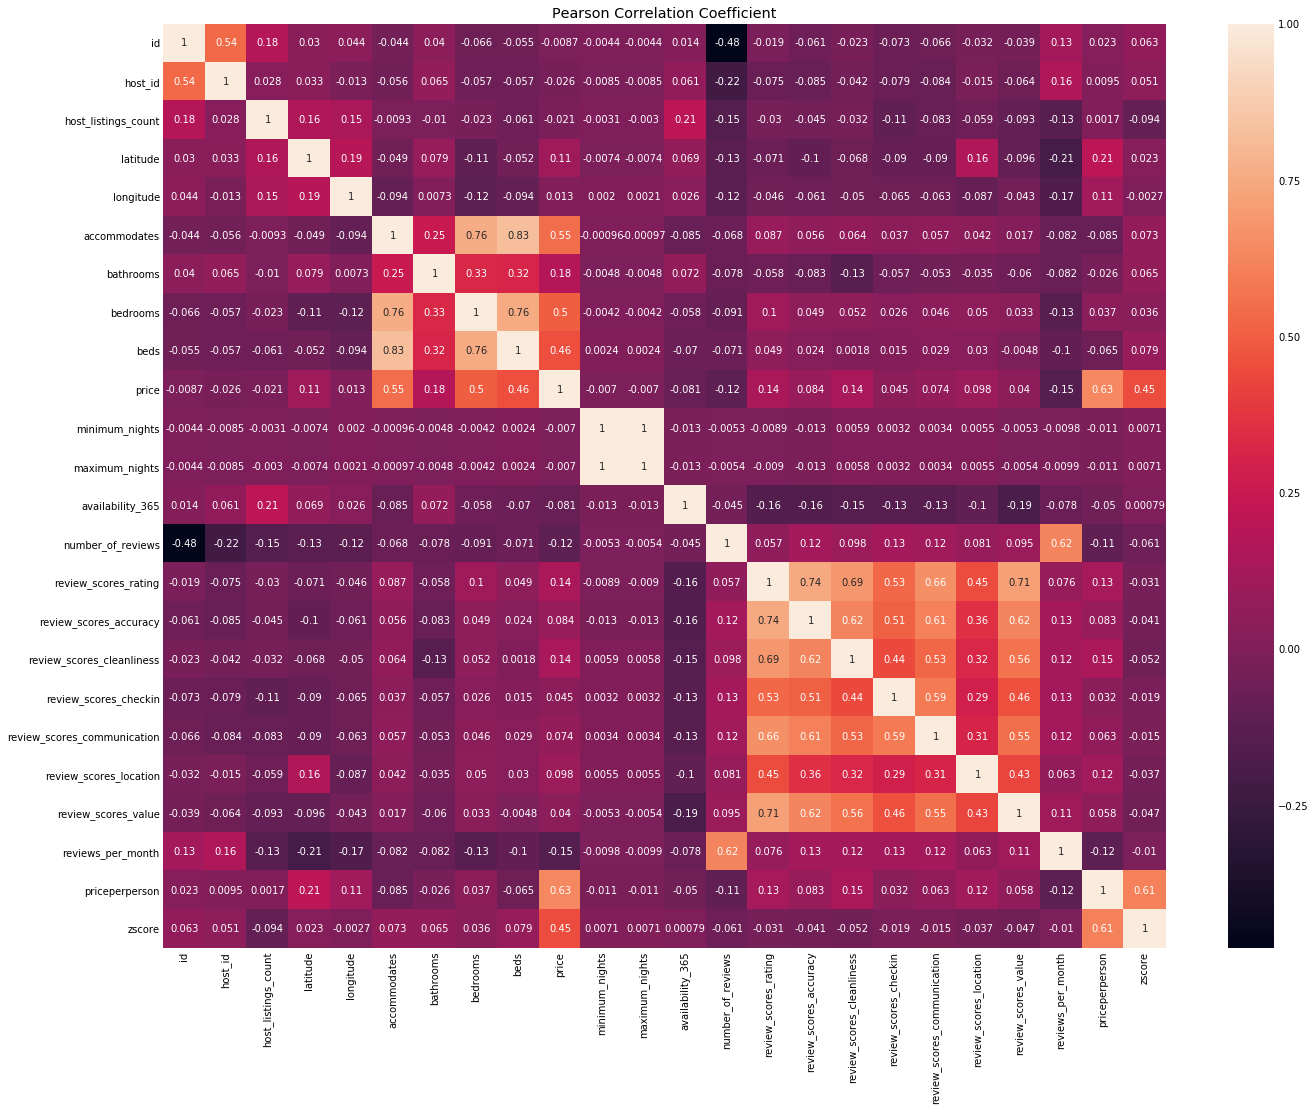

In [11]:
corr= sf.corr(method ='pearson') 
plt.figure(figsize=(20,17))
sns.heatmap(corr, annot=True)
plt.title('Pearson Correlation Coefficient')

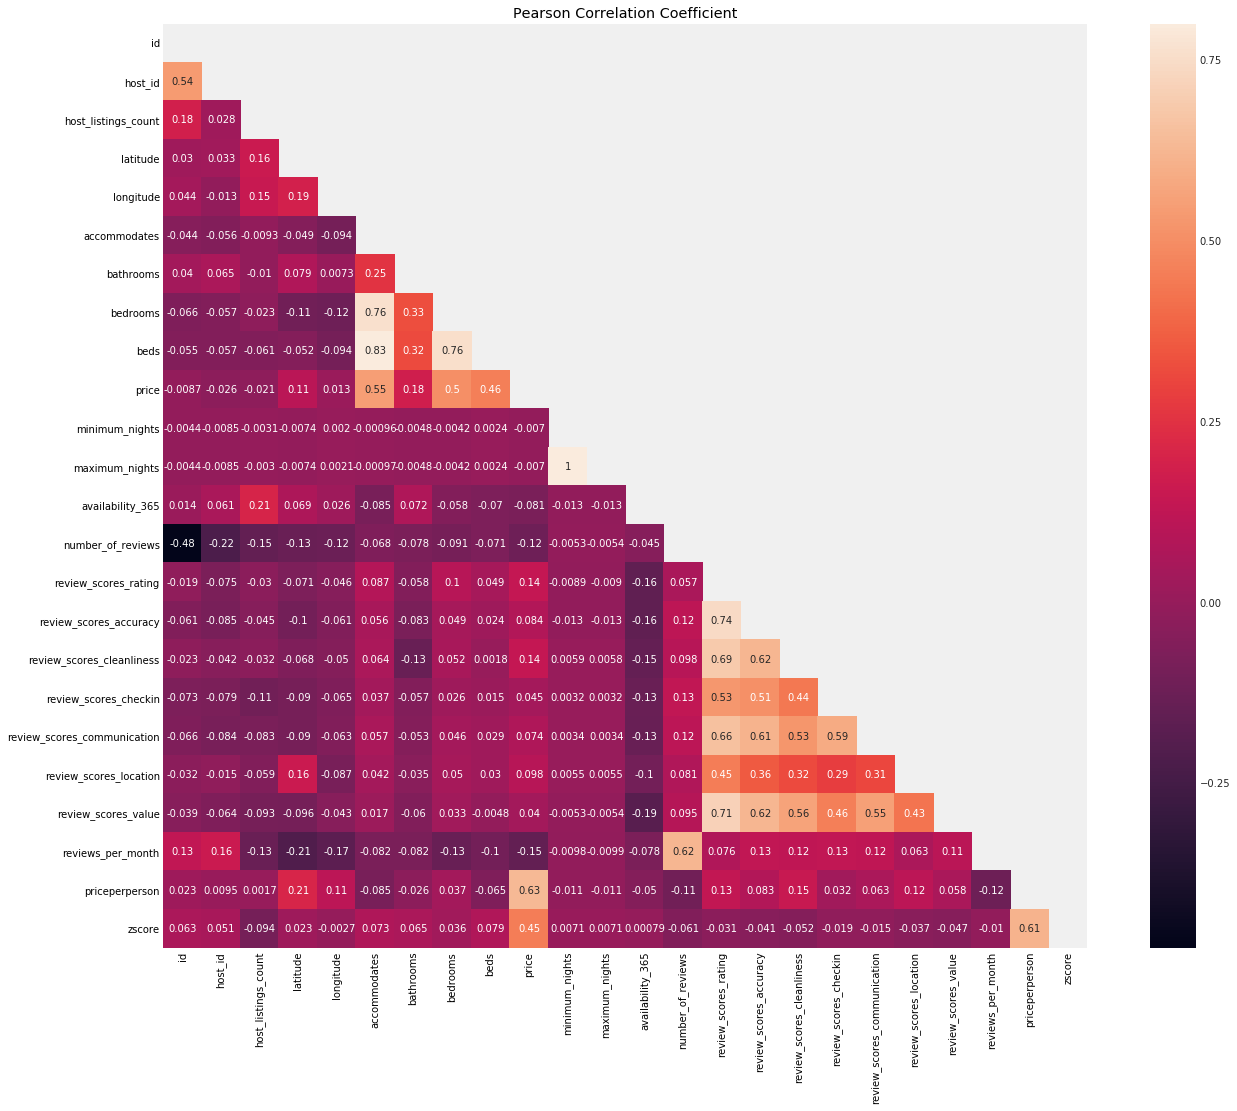

In [34]:
corr = sf.corr(method ='pearson')
mask = np.zeros_like(corr)
plt.figure(figsize=(20,17))
plt.title('Pearson Correlation Coefficient')
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True)

Top Neighborhoods by listing

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

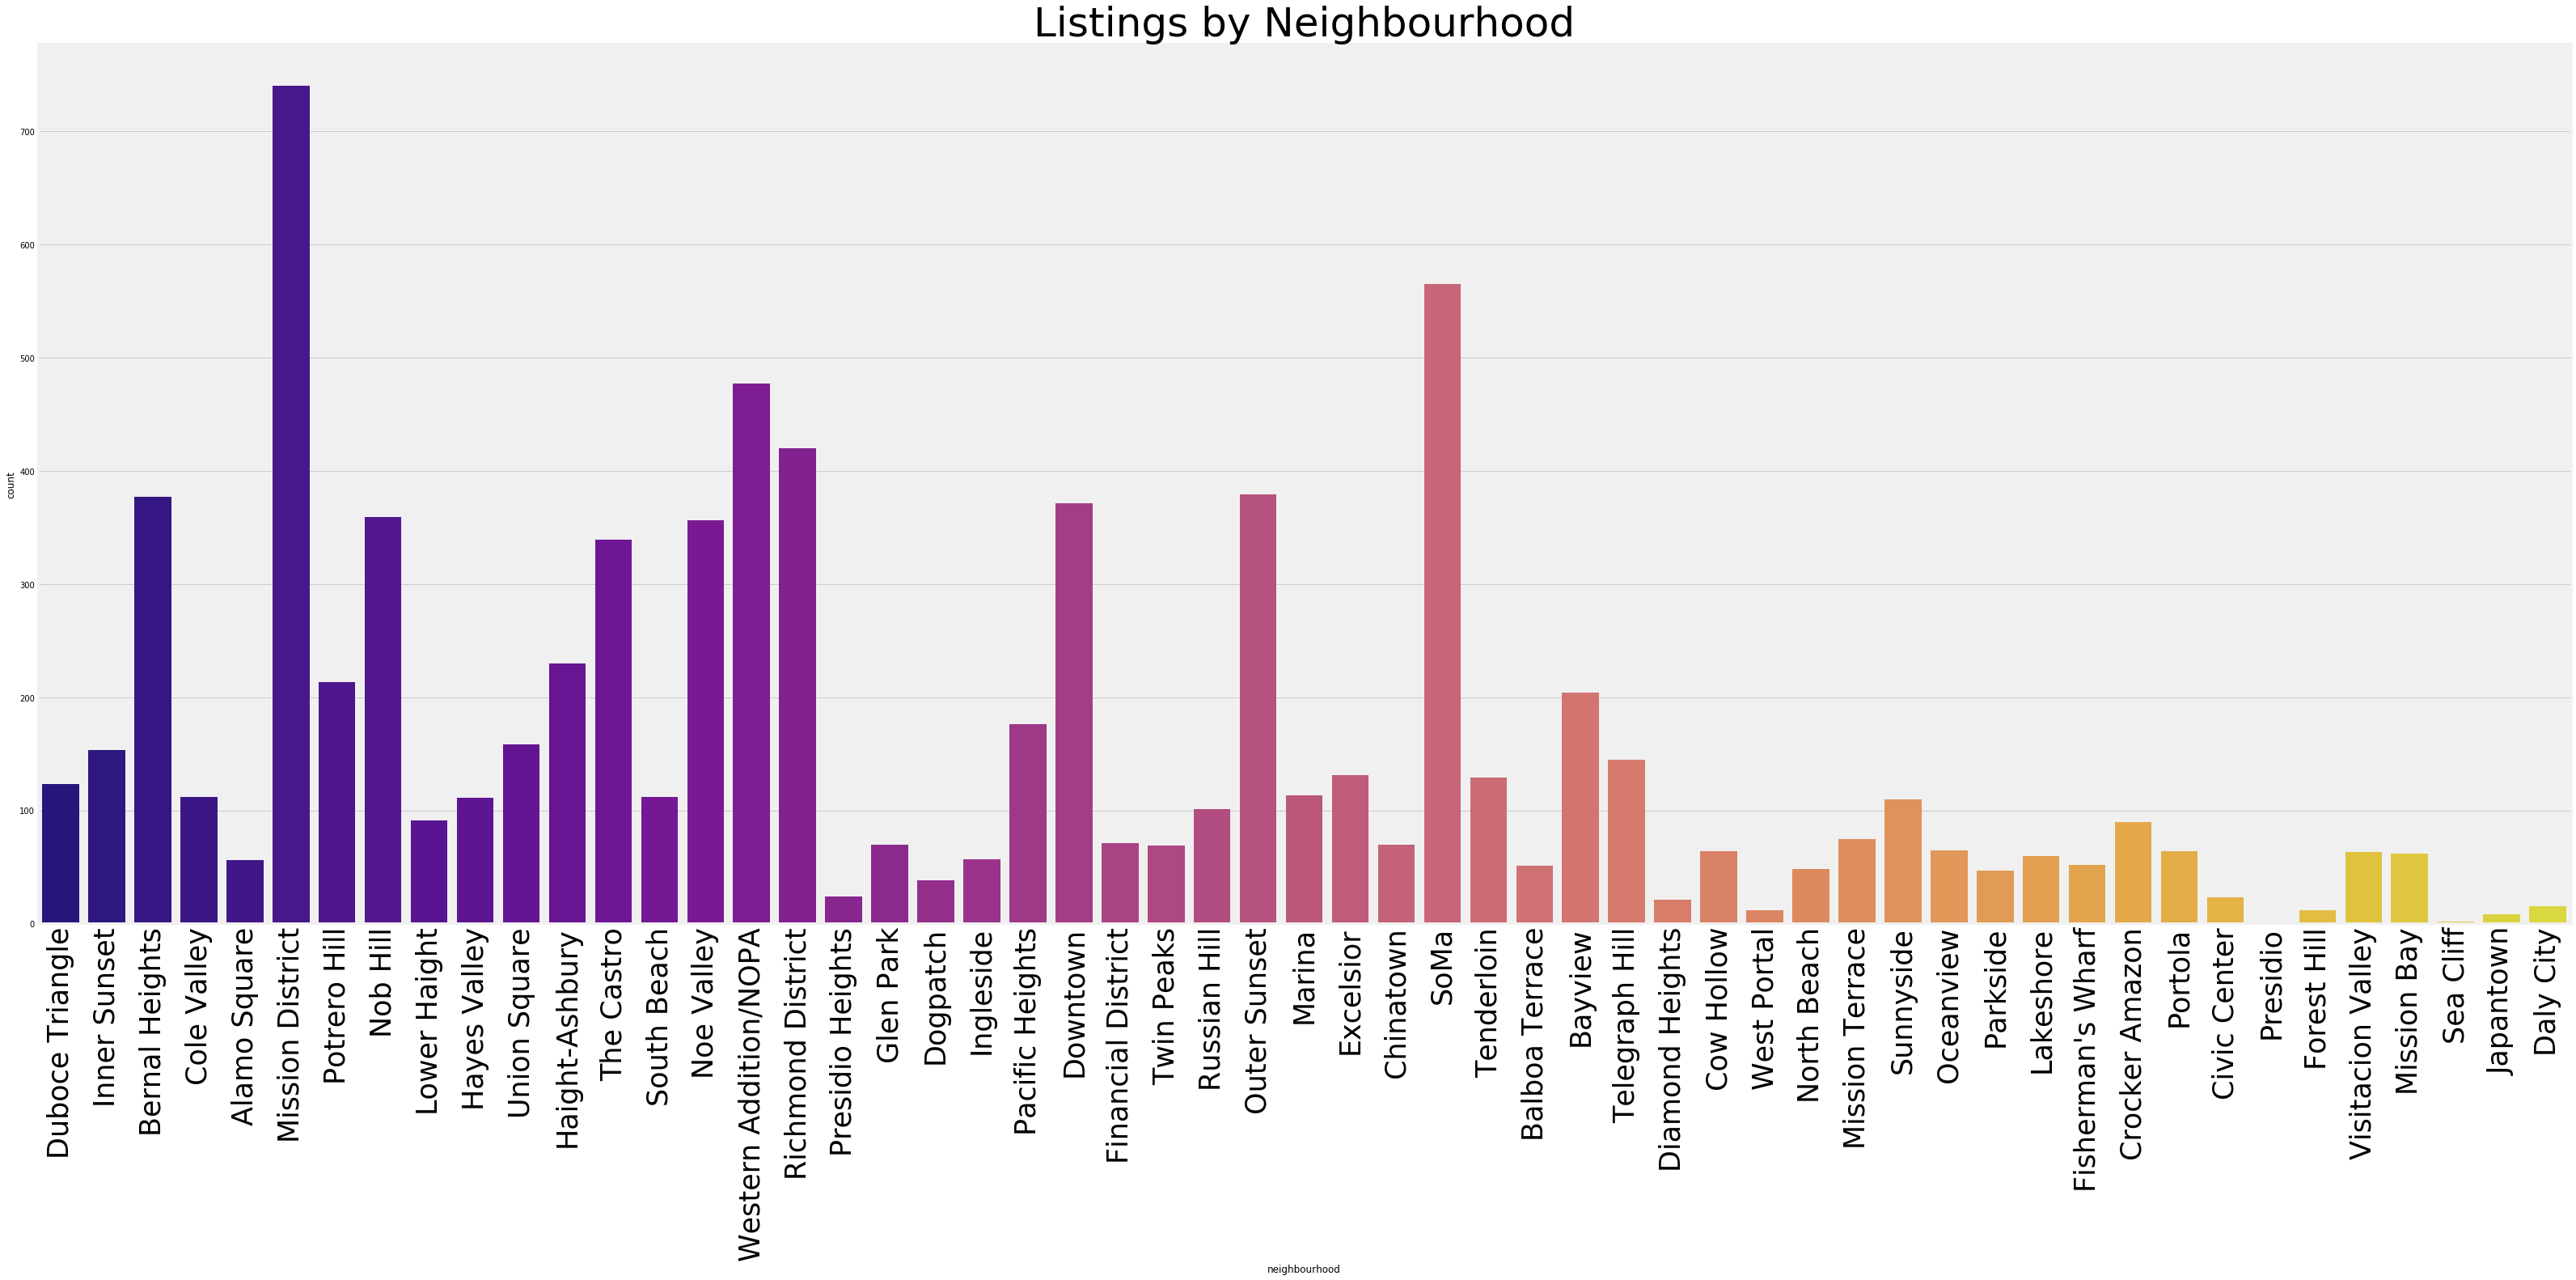

In [10]:
sns.countplot(sf['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(50,20)
plt.title('Listings by Neighbourhood', fontsize='50')
plt.xticks(rotation='vertical', fontsize='35')

Room Type - entire home/apt, private, shared 

Text(0.5, 1.0, 'Type of Listing')

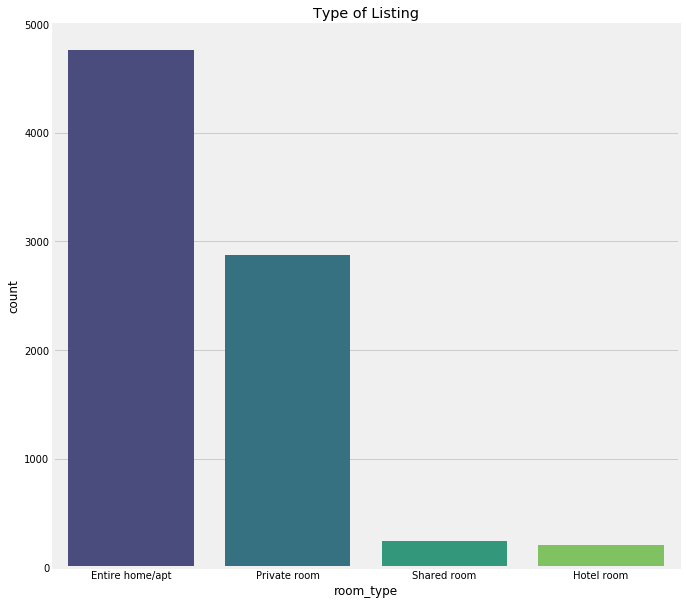

In [11]:
sns.countplot(sf['room_type'], palette="viridis")
fig2 = plt.gcf()
fig2.set_size_inches(10,10)
plt.title('Type of Listing')

Distribution for Number of people accomodated 

Text(0.5, 1.0, 'Distribution of Accomodation')

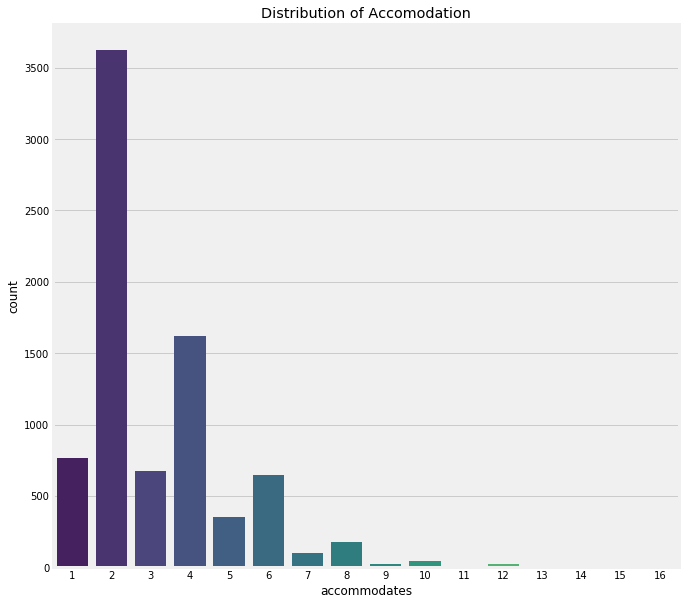

In [36]:
sns.countplot(sf['accommodates'], palette="viridis")
fig2 = plt.gcf()
fig2.set_size_inches(10,10)
plt.title('Distribution of Accomodation')

Distribution of Neighborhoods by Avg price

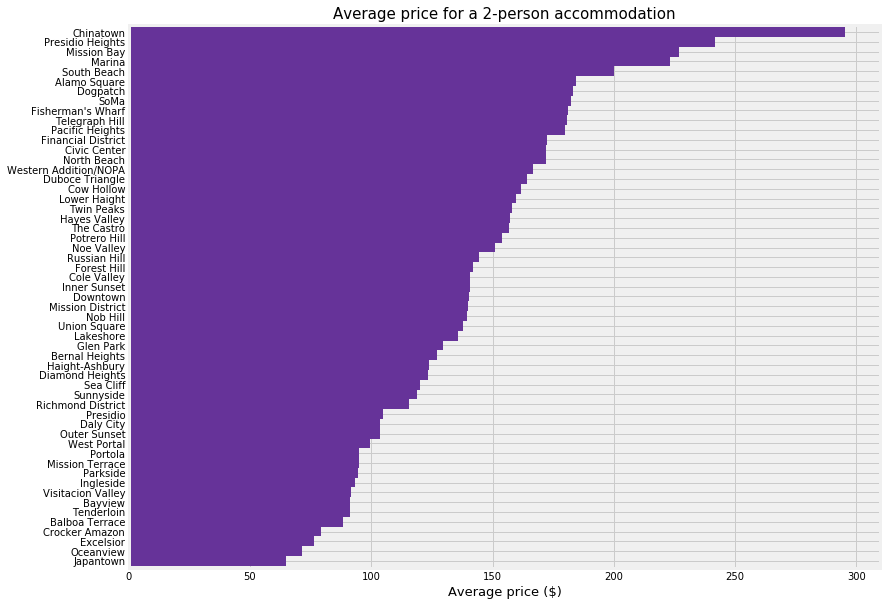

In [18]:
feq = sf[sf['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(12, 10), color='rebeccapurple', width=1)
plt.title("Average price for a 2-person accommodation", fontsize=15)
plt.xlabel('Average price ($)', fontsize=13)
plt.ylabel("")
plt.show()

Distribution of room type by avg price

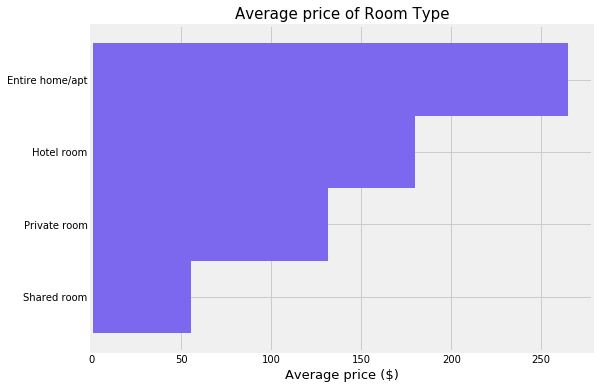

In [51]:
avg= sf.groupby('room_type')['price'].mean().sort_values(ascending=True)
avg.plot.barh(figsize=(8, 6), color='mediumslateblue', width=1)
plt.title("Average price of Room Type", fontsize=15)
plt.xlabel('Average price ($)', fontsize=13)
plt.ylabel("")
plt.show()

Distribution of # bedrooms and # bathrooms

Text(0.5, 1.0, 'Distribution of Bedrooms')

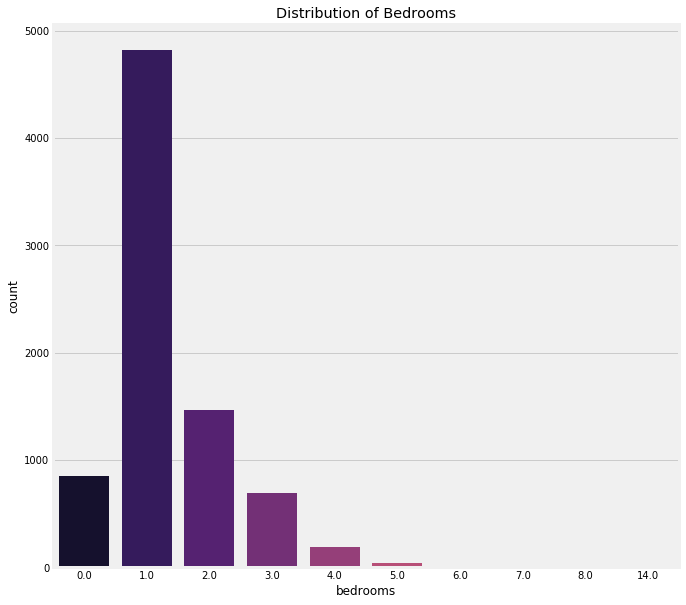

In [22]:
sns.countplot(sf['bedrooms'], palette="magma")
fig2 = plt.gcf()
fig2.set_size_inches(10,10)
plt.title('Distribution of Bedrooms')

Text(0.5, 1.0, 'Distribution of Bathrooms')

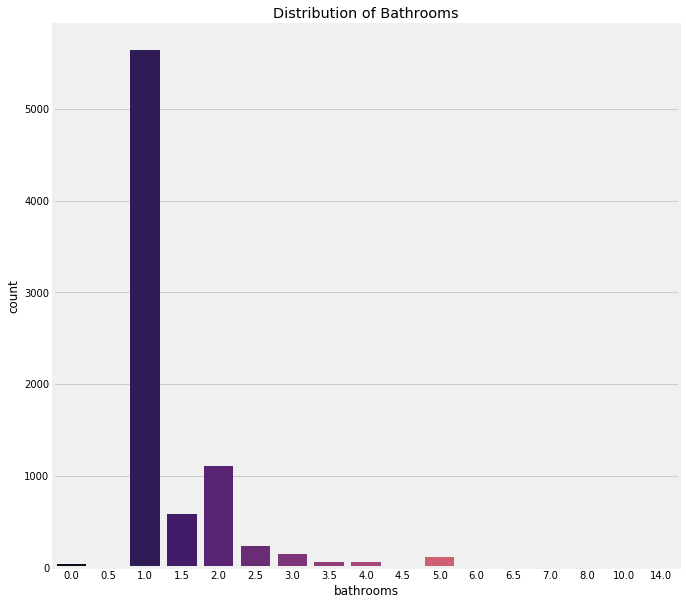

In [23]:
sns.countplot(sf['bathrooms'], palette="magma")
fig2 = plt.gcf()
fig2.set_size_inches(10,10)
plt.title('Distribution of Bathrooms')

How many AirBnb hosts are superhosts?

Text(0.5, 1.0, 'Is the host a Superhost?')

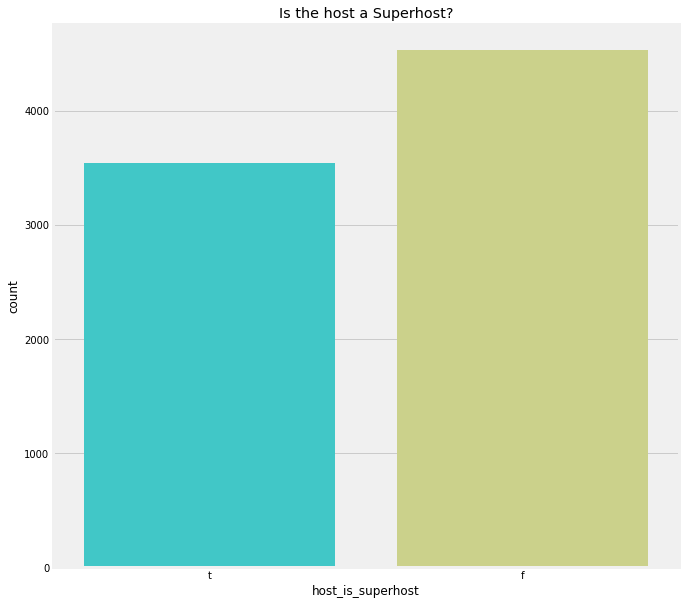

In [25]:
sns.countplot(sf['host_is_superhost'], palette="rainbow")
fig2 = plt.gcf()
fig2.set_size_inches(10,10)
plt.title('Is the host a Superhost?')

Heatmap of Prices using Latitude and Longitude

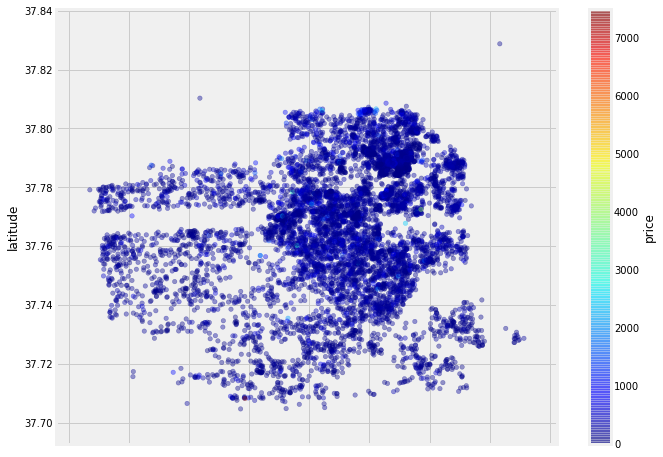

In [27]:
#Visualising all listings and their prices
sf.plot(kind='scatter', x='longitude', y='latitude', c='price', title='Heatmap of All Prices',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))


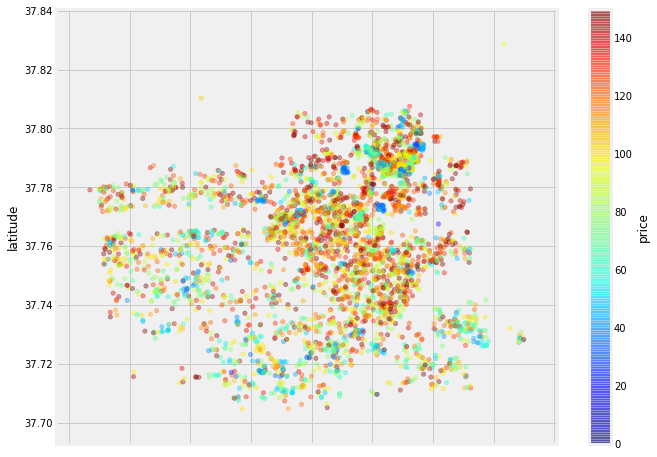

In [27]:
#Using Avg Price of 150 or less to subset listings 
subset=sf[sf.price <= 150]
viz4=subset.plot(kind='scatter', x='longitude', y='latitude', c='price', title='',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz4

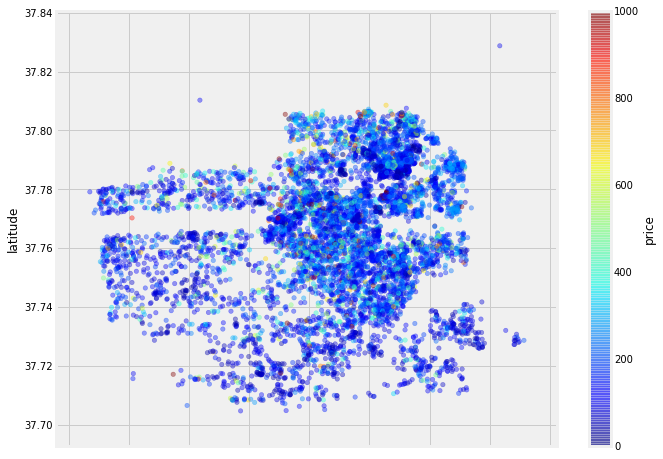

In [40]:
#Subsetting prices less than or equal to 1000
subset=sf[sf.price <=1000]
viz4=subset.plot(kind='scatter', x='longitude', y='latitude', c='price', title="", cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz4

Viewing all listings in an interactive map 

In [12]:
import folium
from folium.plugins import FastMarkerCluster

In [13]:
lats = sf['latitude'].tolist()
lons = sf['longitude'].tolist()
locations = list(zip(lats, lons))



map1 = folium.Map(location=[37.70, -122.51])
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
map1.save('index.html') 
#saved in jupyter homepage